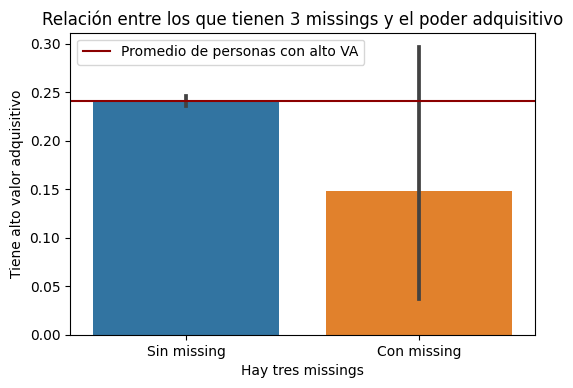

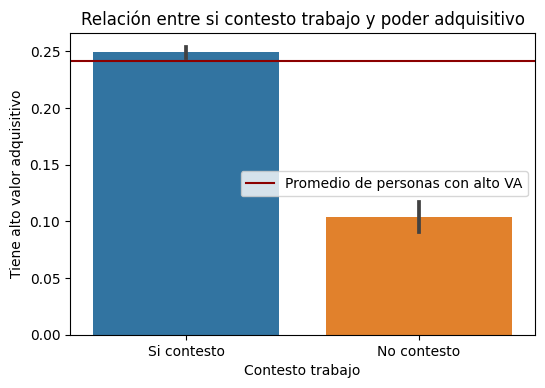

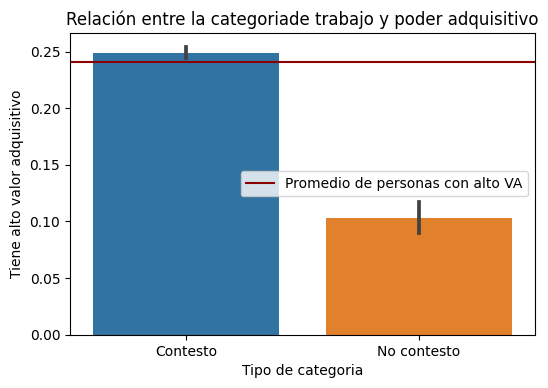

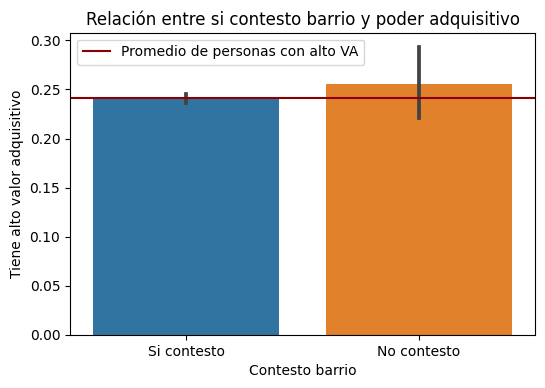

In [1]:
%run "../Secciones/feature_engineering.ipynb"

### Categoria de Trabajo

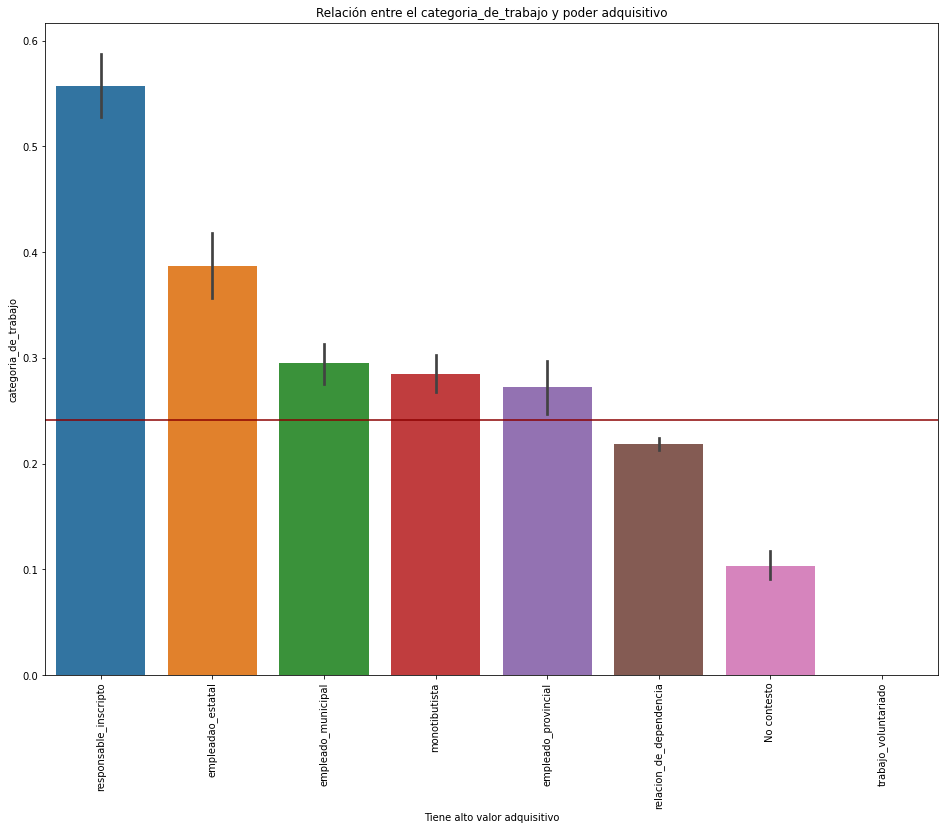

Index(['responsable_inscripto', 'empleadao_estatal', 'empleado_municipal',
       'monotibutista', 'empleado_provincial', 'relacion_de_dependencia',
       'No contesto', 'trabajo_voluntariado'],
      dtype='object', name='categoria_de_trabajo')

In [15]:
#BARPLOT
plt.figure(figsize=(16, 12))
df_comunas = df[['categoria_de_trabajo', 'tiene_alto_valor_adquisitivo']].copy()
indices = df_comunas.groupby('categoria_de_trabajo')['tiene_alto_valor_adquisitivo'].aggregate(lambda x: np.mean(x))

ax = sns.barplot(
    data=df,
    x='categoria_de_trabajo',
    y='tiene_alto_valor_adquisitivo',
    order= indices.sort_values(ascending=False).index)

plt.ylabel("categoria_de_trabajo")
plt.xlabel("Tiene alto valor adquisitivo")
plt.xticks(rotation=90)
plt.title('Relación entre el categoria_de_trabajo y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.show()
indices.sort_values(ascending=False).index

In [3]:
condicion = (df['categoria_de_trabajo'] == 'responsable_inscripto') | (df['categoria_de_trabajo'] == 'empleado_estatal') | (df['categoria_de_trabajo'] == 'empleado_municipal') | (df['categoria_de_trabajo'] == 'monotributista') | (df['categoria_de_trabajo'] == 'empleado_provincial')
df[condicion]['tiene_alto_valor_adquisitivo'].value_counts()

0    2915
1    1592
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [4]:
df[condicion]['tiene_alto_valor_adquisitivo'].value_counts().tolist()[1]/df[condicion]['tiene_alto_valor_adquisitivo'].value_counts().sum() * 100

35.32283115154205

In [5]:
df[condicion]['tiene_alto_valor_adquisitivo'].value_counts().tolist()[1]/df['tiene_alto_valor_adquisitivo'].value_counts().sum() * 100

4.894395425338949

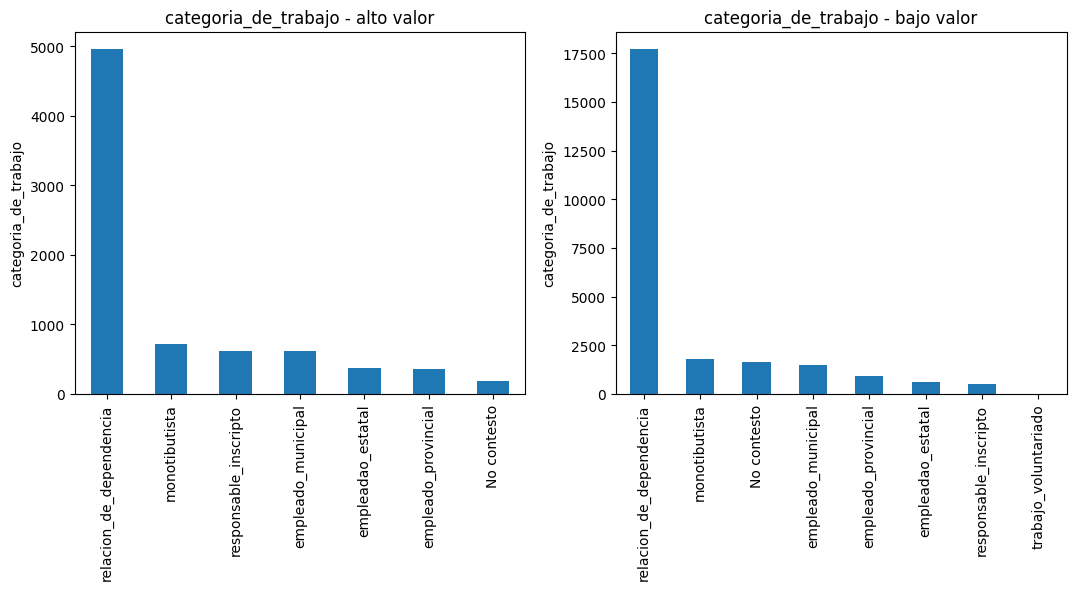

In [6]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_alto_valor = df[df['tiene_alto_valor_adquisitivo'] == 1]
df_bajo_valor = df[df['tiene_alto_valor_adquisitivo'] != 1]

df_alto_valor.categoria_de_trabajo.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title("categoria_de_trabajo - alto valor")
axes[0].set_ylabel("categoria_de_trabajo")

df_bajo_valor.categoria_de_trabajo.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title("categoria_de_trabajo - bajo valor")
axes[1].set_ylabel("categoria_de_trabajo")

plt.show()

In [7]:
total_alto_valor = df_alto_valor['categoria_de_trabajo'].value_counts().sum()
condicion = (df_alto_valor['categoria_de_trabajo'] == 'relacion_de_dependencia')
total_buenos_trabajos = df_alto_valor[condicion].value_counts().sum()
total_buenos_trabajos/total_alto_valor*100

63.32780400663519

In [8]:
total_general = df['categoria_de_trabajo'].value_counts().sum()
condicion = (df['categoria_de_trabajo'] == 'relacion_de_dependencia')
total_buenos_trabajos = df[condicion].value_counts().sum()
total_buenos_trabajos/total_general*100

69.77587850093768

### Estado marital vs categoria trabajo

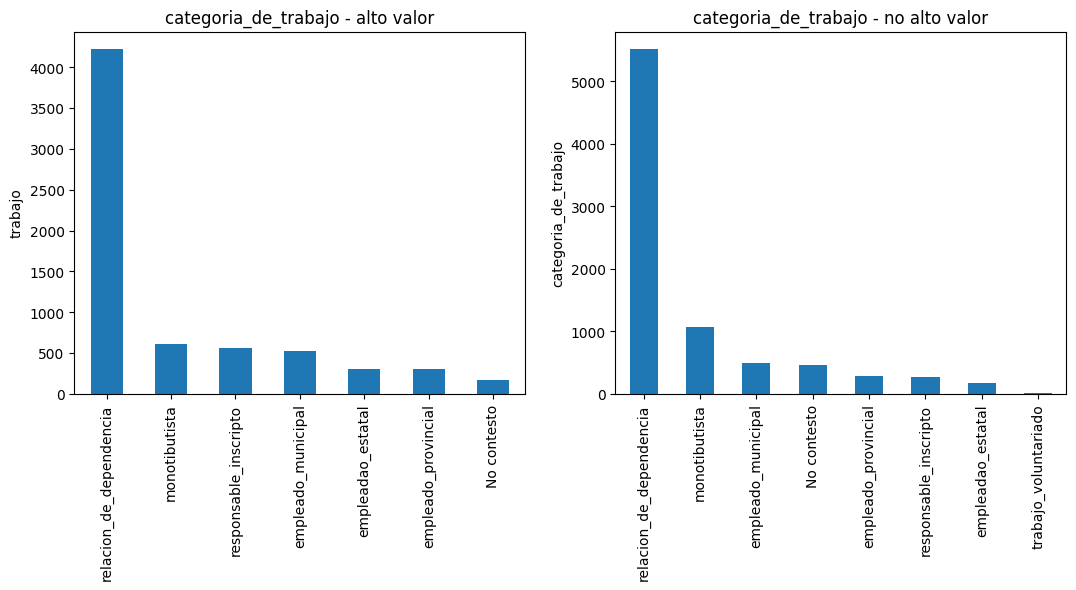

In [9]:
df_matrimonio = df[df['estado_marital'] == 'matrimonio']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_mat_alto_valor = df_matrimonio[df_matrimonio['tiene_alto_valor_adquisitivo'] == 1]
df_mat_bajo_valor = df_matrimonio[df_matrimonio['tiene_alto_valor_adquisitivo'] != 1]

df_mat_alto_valor.categoria_de_trabajo.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title("categoria_de_trabajo - alto valor")
axes[0].set_ylabel("trabajo")

df_mat_bajo_valor.categoria_de_trabajo.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title("categoria_de_trabajo - no alto valor")
axes[1].set_ylabel("categoria_de_trabajo")

plt.show()

In [10]:
total_alto_valor = df_mat_alto_valor['trabajo'].value_counts().sum()
condicion = (df_mat_alto_valor['trabajo'] == 'directivo_gerente') | (df_mat_alto_valor['trabajo'] == 'profesional_especializado') | (df_mat_alto_valor['trabajo'] == 'ventas')
total_buenos_trabajos = df_mat_alto_valor[condicion].value_counts().sum()
total_buenos_trabajos/total_alto_valor*100

59.9731263063601

In [11]:
total_general = df_matrimonio['trabajo'].value_counts().sum()
condicion = (df_matrimonio['trabajo'] == 'directivo_gerente') | (df_matrimonio['trabajo'] == 'profesional_especializado') | (df_mat_alto_valor['trabajo'] == 'ventas')
total_buenos_trabajos/total_general*100

26.80144115292234

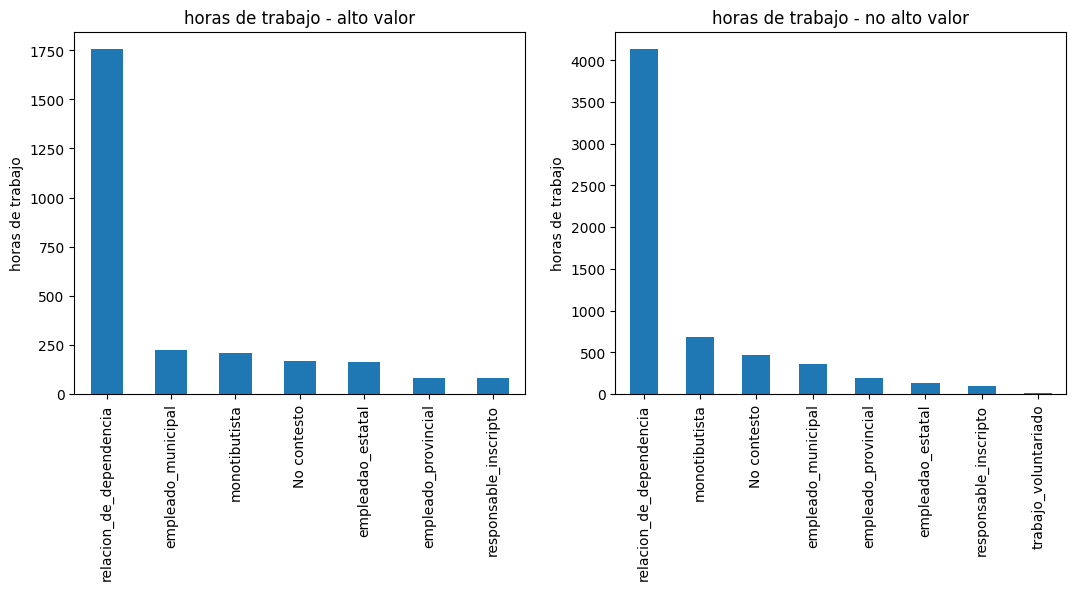

In [12]:
condicion = (df['trabajo'] != 'directivo_gerente') & (df['trabajo'] != 'profesional_especializado') & (df['trabajo'] != 'ventas')
df_sm_nt = df[(df['estado_marital'] == 'matrimonio') & (condicion)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_sm_nt_alto_valor = df_sm_nt[df_sm_nt['tiene_alto_valor_adquisitivo'] == 1]
df_sm_nt_bajo_valor = df_sm_nt[df_sm_nt['tiene_alto_valor_adquisitivo'] != 1]

df_sm_nt_alto_valor.categoria_de_trabajo.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title("horas de trabajo - alto valor")
axes[0].set_ylabel("horas de trabajo")

df_sm_nt_bajo_valor.categoria_de_trabajo.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title("horas de trabajo - no alto valor")
axes[1].set_ylabel("horas de trabajo")

plt.show()

In [13]:
df_sm_nt_alto_valor[df_sm_nt_alto_valor['anios_estudiados'] >= 14.5].value_counts().sum()/df_alto_valor.value_counts().sum() * 100

10.43766747479903

In [14]:
df_sm_nt_bajo_valor[df_sm_nt_bajo_valor['anios_estudiados'] >= 14.5].value_counts().sum()/df_no_alto_valor.value_counts().sum() * 100

NameError: name 'df_no_alto_valor' is not defined

In [ ]:
df_sm_nt_bajo_valor

In [ ]:
condicion_trabajo = (df['trabajo'] != 'directivo_gerente') & (df['trabajo'] != 'profesional_especializado') & (df['trabajo'] != 'ventas')
df_sm_nt_ne = df[(df['estado_marital'] == 'matrimonio') & (condicion_trabajo) & (df['anios_estudiados'] < 14.5)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_sm_nt_ne_alto_valor = df_sm_nt_ne[df_sm_nt_ne['tiene_alto_valor_adquisitivo'] == 1]
df_sm_nt_ne_bajo_valor = df_sm_nt_ne[df_sm_nt_ne['tiene_alto_valor_adquisitivo'] != 1]

df_sm_nt_ne_alto_valor.categoria_de_trabajo.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title("horas de trabajo - alto valor")
axes[0].set_ylabel("horas de trabajo")

df_sm_nt_ne_bajo_valor.categoria_de_trabajo.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title("horas de trabajo - no alto valor")
axes[1].set_ylabel("horas de trabajo")

plt.show()